# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 2: *LowHighFilters*
Filter an image in frequency domain
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

from ImageUtilities import imageReadL, plotImageL, createImageF, plotImageF
from FourierUtilities import computeCoefficients, computePowerfromCoefficients, reconstruction
from ImageOperatorsUtilities import imageLogF

# Math functions and iteration
from math import sqrt
from timeit import itertools

### Read and show input image

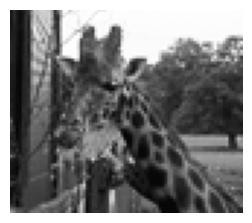

In [2]:
imageName = "Giraffe.png"
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter2/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 3)

### Compute Coefficients

In [3]:
coeff, maxFreqW, maxFreqH = computeCoefficients(inputImage)

0 / 80  .. 1 / 80  .. 2 / 80  .. 3 / 80  .. 4 / 80  .. 5 / 80  .. 6 / 80  .. 7 / 80  .. 8 / 80  .. 9 / 80  .. 10 / 80  .. 11 / 80  .. 12 / 80  .. 13 / 80  .. 14 / 80  .. 15 / 80  .. 16 / 80  .. 17 / 80  .. 18 / 80  .. 19 / 80  .. 20 / 80  .. 21 / 80  .. 22 / 80  .. 23 / 80  .. 24 / 80  .. 25 / 80  .. 26 / 80  .. 27 / 80  .. 28 / 80  .. 29 / 80  .. 30 / 80  .. 31 / 80  .. 32 / 80  .. 33 / 80  .. 34 / 80  .. 35 / 80  .. 36 / 80  .. 37 / 80  .. 38 / 80  .. 39 / 80  .. 40 / 80  .. 41 / 80  .. 42 / 80  .. 43 / 80  .. 44 / 80  .. 45 / 80  .. 46 / 80  .. 47 / 80  .. 48 / 80  .. 49 / 80  .. 50 / 80  .. 51 / 80  .. 52 / 80  .. 53 / 80  .. 54 / 80  .. 55 / 80  .. 56 / 80  .. 57 / 80  .. 58 / 80  .. 59 / 80  .. 60 / 80  .. 61 / 80  .. 62 / 80  .. 63 / 80  .. 64 / 80  .. 65 / 80  .. 66 / 80  .. 67 / 80  .. 68 / 80  .. 69 / 80  .. 70 / 80  .. 71 / 80  .. 72 / 80  .. 73 / 80  .. 74 / 80  .. 75 / 80  .. 76 / 80  .. 77 / 80  .. 78 / 80  .. 79 / 80  .. 80 / 80  .. 

### Filter to get low and high frequency versions

In [4]:
coeffLow = createImageF( 1 + 2 * maxFreqW, 1 + 2 * maxFreqH, 2)
coeffHigh = createImageF( 1 + 2 * maxFreqW, 1 + 2 * maxFreqH, 2)

cutFrequency = maxFreqW / 8

for kw,kh in itertools.product(range(-maxFreqW, maxFreqW + 1),        \
                               range(-maxFreqH, maxFreqH + 1)):   
    IndexW, indexH = kw + maxFreqW, kh + maxFreqH
    
    if sqrt(kw * kw + kh * kh) < cutFrequency:
        coeffLow[indexH, IndexW][0] = coeff[indexH, IndexW][0]
        coeffLow[indexH, IndexW][1] = coeff[indexH, IndexW][1]
    else:
        coeffHigh[indexH, IndexW][0] = coeff[indexH, IndexW][0]
        coeffHigh[indexH, IndexW][1] = coeff[indexH, IndexW][1]
            

### Show frequency power

0 / 80  .. 1 / 80  .. 2 / 80  .. 3 / 80  .. 4 / 80  .. 5 / 80  .. 6 / 80  .. 7 / 80  .. 8 / 80  .. 9 / 80  .. 10 / 80  .. 11 / 80  .. 12 / 80  .. 13 / 80  .. 14 / 80  .. 15 / 80  .. 16 / 80  .. 17 / 80  .. 18 / 80  .. 19 / 80  .. 20 / 80  .. 21 / 80  .. 22 / 80  .. 23 / 80  .. 24 / 80  .. 25 / 80  .. 26 / 80  .. 27 / 80  .. 28 / 80  .. 29 / 80  .. 30 / 80  .. 31 / 80  .. 32 / 80  .. 33 / 80  .. 34 / 80  .. 35 / 80  .. 36 / 80  .. 37 / 80  .. 38 / 80  .. 39 / 80  .. 40 / 80  .. 41 / 80  .. 42 / 80  .. 43 / 80  .. 44 / 80  .. 45 / 80  .. 46 / 80  .. 47 / 80  .. 48 / 80  .. 49 / 80  .. 50 / 80  .. 51 / 80  .. 52 / 80  .. 53 / 80  .. 54 / 80  .. 55 / 80  .. 56 / 80  .. 57 / 80  .. 58 / 80  .. 59 / 80  .. 60 / 80  .. 61 / 80  .. 62 / 80  .. 63 / 80  .. 64 / 80  .. 65 / 80  .. 66 / 80  .. 67 / 80  .. 68 / 80  .. 69 / 80  .. 70 / 80  .. 71 / 80  .. 72 / 80  .. 73 / 80  .. 74 / 80  .. 75 / 80  .. 76 / 80  .. 77 / 80  .. 78 / 80  .. 79 / 80  .. 80 / 80  .. 0 / 80  .. 1 / 80  .. 2 / 80  .. 3 / 8

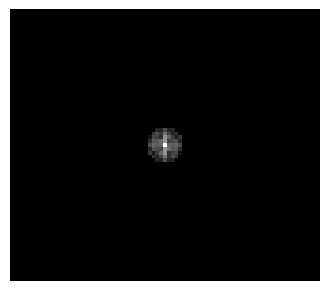

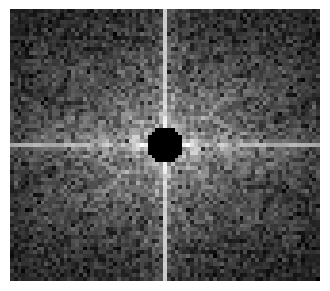

In [10]:
# Power
powerLow = computePowerfromCoefficients(coeffLow)
powerHigh = computePowerfromCoefficients(coeffHigh)

# Show power
powerLowLog = imageLogF(powerLow)
powerHighLog = imageLogF(powerHigh)
plotImageF(powerLowLog, figureSize = 4)
plotImageF(powerHighLog, figureSize = 4)

### Reconstruct images with high and low frequencies

In [11]:
# Reconstruct image
imageLow = reconstruction(coeffLow)
imageHigh = reconstruction(coeffHigh)

0 / 79  .. 1 / 79  .. 2 / 79  .. 3 / 79  .. 4 / 79  .. 5 / 79  .. 6 / 79  .. 7 / 79  .. 8 / 79  .. 9 / 79  .. 10 / 79  .. 11 / 79  .. 12 / 79  .. 13 / 79  .. 14 / 79  .. 15 / 79  .. 16 / 79  .. 17 / 79  .. 18 / 79  .. 19 / 79  .. 20 / 79  .. 21 / 79  .. 22 / 79  .. 23 / 79  .. 24 / 79  .. 25 / 79  .. 26 / 79  .. 27 / 79  .. 28 / 79  .. 29 / 79  .. 30 / 79  .. 31 / 79  .. 32 / 79  .. 33 / 79  .. 34 / 79  .. 35 / 79  .. 36 / 79  .. 37 / 79  .. 38 / 79  .. 39 / 79  .. 40 / 79  .. 41 / 79  .. 42 / 79  .. 43 / 79  .. 44 / 79  .. 45 / 79  .. 46 / 79  .. 47 / 79  .. 48 / 79  .. 49 / 79  .. 50 / 79  .. 51 / 79  .. 52 / 79  .. 53 / 79  .. 54 / 79  .. 55 / 79  .. 56 / 79  .. 57 / 79  .. 58 / 79  .. 59 / 79  .. 60 / 79  .. 61 / 79  .. 62 / 79  .. 63 / 79  .. 64 / 79  .. 65 / 79  .. 66 / 79  .. 67 / 79  .. 68 / 79  .. 69 / 79  .. 70 / 79  .. 71 / 79  .. 72 / 79  .. 73 / 79  .. 74 / 79  .. 75 / 79  .. 76 / 79  .. 77 / 79  .. 78 / 79  .. 79 / 79  .. 0 / 79  .. 1 / 79  .. 2 / 79  .. 3 / 79  .. 4 / 79

### Show reconstructed images

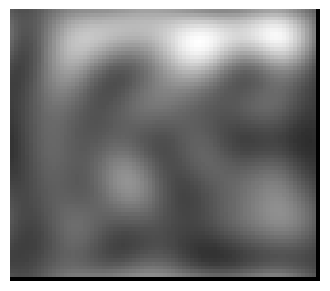

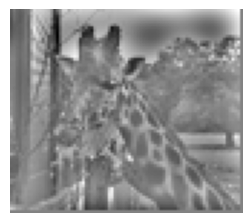

In [12]:
plotImageF(imageLow, figureSize = 3)
plotImageF(imageHigh, figureSize = 3)